## Part Four - Machine Learning
### In this section we will want to train and examine how the data we have collected affects the final decision, i.e. whether a film will be popular and successful.

In [465]:
import pandas as pd 
%matplotlib inline
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# visualization libraries 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image  
import pydotplus
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [466]:
df = pd.read_csv('DF_After_DataCleaning.csv')

### In the first step, we will take all the columns that contain strings, for example we will take the cast column, we will separate each actor name so that each name represents a column (vector in space). We will create a DF   which merge the most repetitive name. After we do that for all columns in our original DF (Cast, Genres, Description, About) we will merge all into a new DF  and do machine learning.

In [467]:
#DESCRIPTION
textlist_Description = []
for cell in df['Description']:
        str1 = ""
        newstring = str1.join(cell)
        textlist_Description.append(newstring)
count_vec = CountVectorizer(stop_words="english", ngram_range=(0, 1), max_features=5000,min_df = 20)

count_vec.fit(textlist_Description)
text_vectorized2 = pd.DataFrame(count_vec.transform(textlist_Description).toarray(), columns=count_vec.get_feature_names())
text_vectorized2  # the table

,accident,action,actor,adventure,agent,american,amid,artist,aspiring,away,...,woman,women,work,world,writer,year,years,york,young,younger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2626,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [468]:
#Cast
text_list_cast = []
for name in df['FullCast']:
        str2 = ""
        newstring1 = str2.join(name)
        text_list_cast.append(newstring1)

#create columns for each name 
count_vec1 = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=5000,min_df = 20)

count_vec1.fit(text_list_cast)
text_vectorized3 = pd.DataFrame(count_vec1.transform(text_list_cast).toarray(), columns=count_vec1.get_feature_names())
text_vectorized3

,julie tejwani,rukh khan,rupa bhimani,shah rukh
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2625,0,0,0,0
2626,0,0,0,0
2627,0,0,0,0
2628,0,0,0,0


In [469]:
#Genre
text_list_GenreFull = []
for Category in df['GenreFull']:
        str3 = ""
        newstring2= str3.join(Category)
        text_list_GenreFull.append(newstring2)

#create columns for each name 
count_vec2 = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=5000,min_df = 350)

count_vec2.fit(text_list_GenreFull)
text_vectorized4 = pd.DataFrame(count_vec2.transform(text_list_GenreFull).toarray(), columns=count_vec2.get_feature_names())
text_vectorized4
        

,action adventure,family movies,language movies,movies based,movies comedies,movies dramas,romantic movies
0,1,2,0,0,1,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...
2625,0,0,1,0,0,0,0
2626,0,0,0,0,0,0,0
2627,0,0,1,0,0,0,0
2628,0,0,1,0,0,0,0


In [470]:
#About 
textlist_AboutFull = []
for subject in df['AboutFull']:
        str5 = ""
        newstring4 = str5.join(subject)
        textlist_AboutFull.append(newstring4)

count_vec4 = CountVectorizer(stop_words="english", ngram_range=(2, 2), max_features=5000,min_df = 65)

count_vec4.fit(textlist_AboutFull)
text_vectorized5 = pd.DataFrame(count_vec4.transform(textlist_AboutFull).toarray(), columns=count_vec4.get_feature_names())
text_vectorized5  # the table

,emotional romantic,feel good,heartfelt feel,raunchy irreverent,witty irreverent
0,0,1,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2625,0,0,0,0,0
2626,0,0,0,0,0
2627,0,0,0,0,0
2628,0,0,0,0,0


### Create a new DF that merge all the vectors we have created

In [471]:
df_new = pd.concat([df, text_vectorized2,text_vectorized4,text_vectorized3], axis=1, join='inner')

In [472]:
df_new.head()

,Title,Year,Duration,MostLiked,Description,Director,FullCast,GenreFull,AboutFull,Age,...,family movies,language movies,movies based,movies comedies,movies dramas,romantic movies,julie tejwani,rukh khan,rupa bhimani,shah rukh
0,The Adam Project,2022.0,106,0.0,"After accidentally crash-landing in 2022, time...",['Shawn Levy'],"['Ryan Reynolds,', 'Mark Ruffalo,', 'Jennifer ...","['Sci-Fi Movies,', 'Family Movies,', 'Action &...","['Witty,', 'Feel-Good,', 'Exciting']",13,...,2,0,0,1,0,0,0,0,0,0
1,Interstellar,2014.0,169,1.0,With humanity teetering on the brink of extinc...,['Christopher Nolan'],"['Matthew McConaughey,', 'Anne Hathaway,', 'Je...","['Sci-Fi Movies,', 'Action & Adventure,', 'Dra...","['Mind-Bending,', 'Cerebral']",13,...,0,0,0,0,0,0,0,0,0,0
2,Red Notice,2021.0,118,0.0,An FBI profiler pursuing the world's most want...,['Rawson Marshall Thurber'],"['Dwayne Johnson,', 'Ryan Reynolds,', 'Gal Gad...","['Action & Adventure,', 'Comedies,', 'Crime Mo...","['Irreverent,', 'Exciting']",13,...,0,0,0,0,0,0,0,0,0,0
3,Abduction,2011.0,105,0.0,When a teen comes across his own childhood pho...,['John Singleton'],"['Taylor Lautner,', 'Lily Collins,', 'Alfred M...","['Mysteries,', 'Action & Adventure']","['Suspenseful,', 'Exciting']",13,...,0,0,0,0,0,0,0,0,0,0
4,13 Hours: The Secret Soldiers of Benghazi,2016.0,145,0.0,Members of an elite security team battle to sa...,['Michael Bay'],"['John Krasinski,', 'James Badge Dale,', 'Max ...","['Military Movies,', 'Movies Based on Real Lif...","['Gritty,', 'Exciting']",16,...,0,0,2,0,0,0,0,0,0,0


### Delete columns that no longer relevant in the new DF

In [473]:
df_new.drop('Description', inplace=True, axis=1)

In [474]:
df_new.drop('Director', inplace=True, axis=1)

In [475]:
df_new.drop('FullCast', inplace=True, axis=1)

In [476]:
df_new.drop('GenreFull', inplace=True, axis=1)

In [477]:
df_new.drop('AboutFull', inplace=True, axis=1)

In [478]:
df_new = df_new.set_index('Title')

In [479]:
df_new

,Year,Duration,MostLiked,Age,accident,action,actor,adventure,agent,american,...,family movies,language movies,movies based,movies comedies,movies dramas,romantic movies,julie tejwani,rukh khan,rupa bhimani,shah rukh
Title,,,,,,,,,,,,,,,,,,,,,
The Adam Project,2022.0,106,0.0,13,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,0
Interstellar,2014.0,169,1.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Red Notice,2021.0,118,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abduction,2011.0,105,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13 Hours: The Secret Soldiers of Benghazi,2016.0,145,0.0,16,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aaviri,2019.0,109,0.0,13,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Until Midnight,2019.0,77,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kolaiyuthir Kaalam,2019.0,107,0.0,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Randomly selects several rows of movies that are not defined as favorite movies on Netflix according to the number of movies that are defined as especially favorite and do the machine learning.

In [480]:
requires_n = df_new['MostLiked'].value_counts().min()
print(requires_n)
negative= df_new[df_new['MostLiked'] == 0].sample(n=requires_n)
positive = df_new[df_new['MostLiked'] == 1].sample(n=requires_n)
down_sampling_data = pd.concat([negative, positive])

51


## The random Data Frame

In [481]:
down_sampling_data

,Year,Duration,MostLiked,Age,accident,action,actor,adventure,agent,american,...,family movies,language movies,movies based,movies comedies,movies dramas,romantic movies,julie tejwani,rukh khan,rupa bhimani,shah rukh
Title,,,,,,,,,,,,,,,,,,,,,
Despite Everything,2019.0,78,0.0,16,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Radhe Shyam (Hindi),2022.0,138,0.0,13,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
KD (A) Karuppudurai,2019.0,116,0.0,13,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Monty Python: Live at Aspen,1998.0,93,0.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mighty Express: Train Trouble,2022.0,83,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fight Club,1999.0,139,1.0,16,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Star Trek Into Darkness,2013.0,133,1.0,13,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
My Neighbor Totoro,1988.0,87,1.0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [482]:
y = down_sampling_data["MostLiked"].values
x = down_sampling_data.drop(["MostLiked"],axis=1)

In [483]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

##  KNN Algorithm 
### Given the input of a new example, the algorithm belongs to the common group according to K  nearest neighbors.

In [484]:
train_MLiked = []
test_MLiked = []
k_values = []
for k in range(1, 25):
    k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    
    tr_MLiked = knn.score(x_train, y_train)
    train_MLiked.append(tr_MLiked)
    
    te_MLiked = knn.score(x_test, y_test)
    test_MLiked.append(te_MLiked)

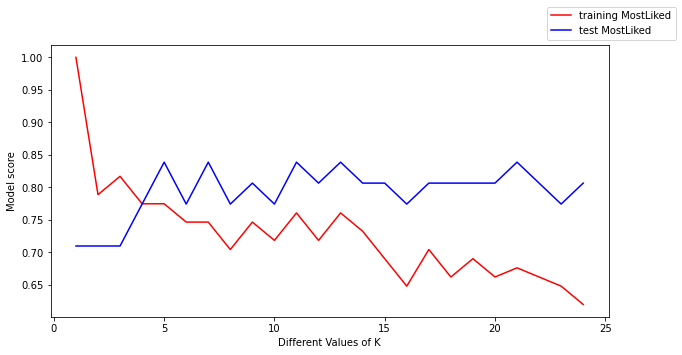

In [485]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_values, train_MLiked, color = 'r', label = "training MostLiked")
plt.plot(k_values, test_MLiked, color = 'b', label = 'test MostLiked')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [492]:
knn = KNeighborsClassifier(n_neighbors = 3)
#Fit the model
knn.fit(x_train,y_train)
#get the score
knn.score(x_test,y_test)

0.7096774193548387

## Decision Tree Algorithm
### A decision tree used as a predictive model, which maps observations on an item and draws conclusions about the target value of the item.
### In our case, an observation map shows whether the movie will be particularly popular according to random parameters it chooses (popular words from the description, popular genres....)
### We will define:
### Popular movie - y1
### Unpopular Movie - y0

In [487]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model_clf = dtree_model.fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.6451612903225806


In [488]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [489]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [490]:
dtree_model = DecisionTreeClassifier(max_depth = 2)
dtree_model_clf = dtree_model.fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_predictions))

Accuracy: 0.6451612903225806


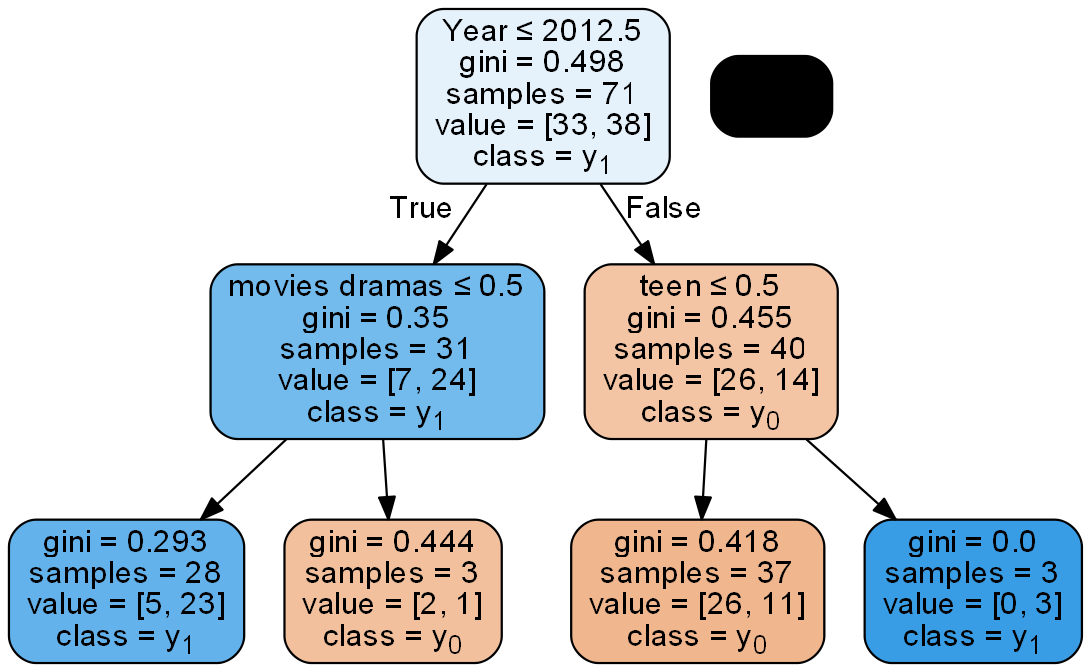

In [491]:
dot_data = StringIO()
export_graphviz(dtree_model_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x.columns,class_names = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
graph.set_size('"60,7!"')
graph.write_png('resized_tree.png')
Image(graph.create_png())